In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [2]:
def show_image(img, name):
    cv2.namedWindow(name, cv2.WINDOW_NORMAL)
    cv2.imshow(name, img)
    cv2.waitKey(0)

In [3]:
def show_hist(img):
    hist,bins = np.histogram(img.flatten(),256,[0,256])

    cdf = hist.cumsum()
    cdf_normalized = cdf * hist.max()/ cdf.max()

    plt.plot(cdf_normalized, color = 'g')
    plt.hist(img.flatten(),256,[0,256], color = 'c')
    plt.xlim([0,256])
    plt.legend(('cdf','stretch hist'), loc = 'upper left')
    plt.show()

In [4]:
def equalize_hist(img, levels):
    new_img = np.zeros(img.shape, np.uint8)
    
    hist, bins = np.histogram(img.flatten(), 256, [0,256]) # count pixels in each level in original
    N = img.size 
    k = 0
    count = 0    
    for g in range(0, 256):
        count += hist[g]
        new_img[img == g] = k # set all those in level g to level k
        if count >= N/levels: # if more than threshold, move to next level in new image
            count = 0
            k = g + 1
            
    return new_img        

### Car

In [5]:
car = cv2.imread("images/carpixel-1976-ferrari-512-bb-.jpg")
car_gray = cv2.cvtColor(car, cv2.COLOR_BGR2GRAY)

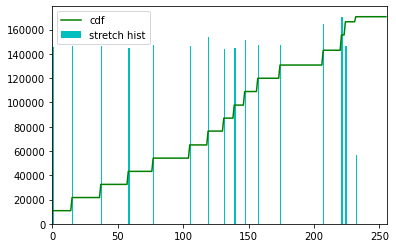

In [6]:
# 16 levels
car_16_equ = equalize_hist(car_gray, 16)
show_image(car_16_equ, "car_16")
show_hist(car_16_equ)

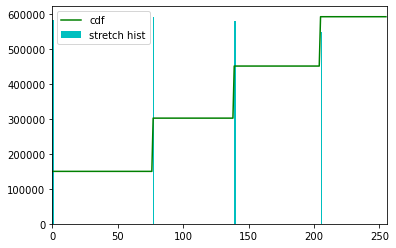

In [7]:
# 4 levels
car_4_equ = equalize_hist(car_gray, 4)
show_image(car_4_equ, "car_4")
show_hist(car_4_equ)

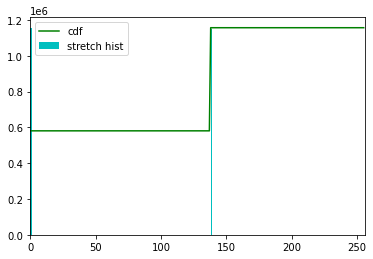

In [8]:
# 2 levels
car_2_equ = equalize_hist(car_gray, 2)
show_image(car_2_equ, "car_2")
show_hist(car_2_equ)

### Cat

In [9]:
cat = cv2.imread("images/cat.bmp")
cat_gray = cv2.cvtColor(cat, cv2.COLOR_BGR2GRAY)

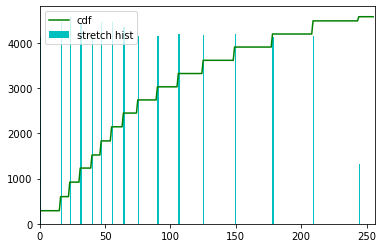

In [10]:
# 16 levels
cat_16_equ = equalize_hist(cat_gray, 16)
show_image(cat_16_equ, "cat_16")
show_hist(cat_16_equ)

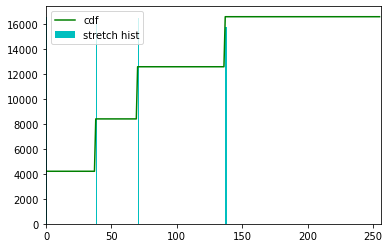

In [11]:
# 4 levels
cat_4_equ = equalize_hist(cat_gray, 4)
show_image(cat_4_equ, "cat_4")
show_hist(cat_4_equ)

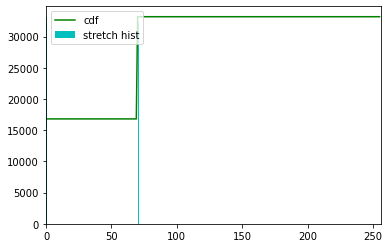

In [12]:
# 2 levels
cat_2_equ = equalize_hist(cat_gray, 2)
show_image(cat_2_equ, "cat_2")
show_hist(cat_2_equ)